# Programming for Data Science and Artificial Intelligence

## 9.1 Supervised Learning - Classification - Logistic Regression Scratch

### Readings: 
- [GERON] Ch4
- [VANDER] Ch5
- [HASTIE] Ch4

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Logistic Regression

Logistic regression is an supervised algorithm for solving classification problem where outcome (target) is discrete.   The idea behind is that $\theta^Tx$ will return a continous value and thus may not be suitable for classification task.  However, if we can find one function $g$ such that

$$g(\theta^Tx) = [0, 1]$$

then we can define our hypothesis function as $g$ and optimize accordingly based on some cost function.

It happens that $g$ (and also our hypothesis function $h$) can be defined as the sigmoid (logit) function as the following:

$$ h = g(\theta^Tx) = \frac{1}{1+e^{-\theta^Tx}} $$

**Trivials**: 
$e$ is a really convenient number for math, for example whenever you take the derivative of $e^x$, you get $e^x$ back again.  It's the only function on Earth that will do that.  Also, $e^x$ always give you positive numbers, thus it is no surprise this $4$ was often used in probability/statistics.  Last, it is convenient to apply $log$ in any optimization problem including $e$ since it will cancel it nicely and will also not change the optimization answer since $log$ is monotically increasing.



Let's see how does it look in code:

Text(0, 0.5, 'y')

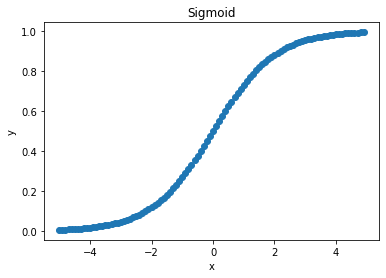

In [2]:
# lambda way 
sigmoid_gen = lambda x: (1+np.exp(-x))**-1

# Function way
def sigmoid(x):
    sig = 1 / (1 + np.exp(-x))
    return sig

# Generate data points
x = np.arange(-5,5,0.1)
y = sigmoid(x)

# Plot the sigmoid
plt.scatter(x, y)
plt.title('Sigmoid')
plt.xlabel('x')
plt.ylabel('y')

Recall the derivative using quotient rule is        

$$ (\frac{f}{g})' = \frac{f'g - fg'}{g^2}$$

Given sigmoid function as

$$ g(x) = \frac{1}{1+e^{-x}} $$

Thus the derivative of sigmoid function is

$$
\begin{aligned}
    \frac{dg}{dx} & = \frac{0(1 + e^{-x}) - (-1)(e^{-x}))}{(1 + e^{-x})^2} \\
    & = \frac{e^{-x}}{(1 + e^{-x})^2}  = \frac{e^{-x} + 1 - 1}{(1 + e^{-x})^2} \\
    & = \frac{1}{(1 + e^{-x})} - \frac{1}{(1 + e^{-x})^2} \\
    & = \frac{1}{(1 + e^{-x})} \big(1 - \frac{1}{(1 + e^{-x})}\big)\\
    & = g(1 - g)
\end{aligned}
$$

Let's look at the gradient by modifying our sigmoid function a little bit.

Text(0, 0.5, 'y')

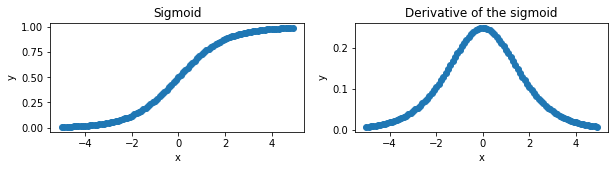

In [3]:
# Formula:
# g(x) = 1 / (1 + np.exp(-x))

# lambda way 
sigmoid_gen = lambda x: (1+np.exp(-x))**-1

# Function way
def sigmoid(x, deriv = False):
    sig = 1 / (1 + np.exp(-x))
    if deriv:
        sig_deriv = sig*(1-sig) 
        return sig_deriv
    else:
        return sig
# Generate data points
x = np.arange(-5,5,0.1)
y = sigmoid(x)
y_deriv = sigmoid(x, deriv = True)

# Plot the sigmoid
_, ax = plt.subplots(1, 2, figsize=(10, 2))
ax1 = ax[0]
ax1.scatter(x, y)
ax1.set_title('Sigmoid')
ax1.set_xlabel('x')
ax1.set_ylabel('y')

# Plot the derivative of the sigmoid
ax2 = ax[1]
ax2.scatter(x, y_deriv)
ax2.set_title('Derivative of the sigmoid')
ax2.set_xlabel('x')
ax2.set_ylabel('y')

**Trivials**: As you can see, the greatest gradient possible is 0.25.  Thus it means that in a gradient descent update, the update speed will be restricted by this value.

So if we had the following function

$$ \theta^Tx = \theta_{0} + \theta_{1}x_{1} + \theta_{2}x_{2} $$

Given some point ($x_{1}$,$x_{2}$), if we plugged it to our sigmoid function, the equation could output a positive result (for one class), negative result (for the other class), or 0 (the point lies right on the decision boundary).

For example, given ($x_{1} = 3$, $x_{2} = 4$) and ($\theta_{1}$ = 1, $\theta_{2}$ = 2) (let's ignore $\theta_{0}$ for simplicity), the following code performs a sigmoid of $\theta^Tx$

In [4]:
X = np.array([3, 4])
w = np.array([1, 2])
print("theta^Tx:", X @ w)
print("sigmoid of theta^Tx: ", sigmoid(X @ w))

theta^Tx: 11
sigmoid of theta^Tx:  0.999983298578152


#### How about other possible squashing function

You may ask why we use sigmoid function.  Well, sigmoid function works pretty well in logistic regression, since most of the time, in logistic regression, we assume that the decision boundary is linear.

However, in more complicated case, we may prefer other *activation* function.  Why?  Because

1. Sigmoid function has small gradients (max of 0.25) and hence may slow down the learning.  This happens especially in a neural network, where a chain of small gradients can greatly reduce the gradient to near zero, the problem so called *vanishing gradients*

2. Also, sigmoid function has almost zero gradients when $x$ is moving above 4 or below -4, thus if we use sigmoid function, it is possible that our gradient descent update is performing almost no learning!

To solve these problems, in the future complicated case, we shall use other *activation* function that has stronger gradients but also maintain a squashing property of squashing continuous values to discrete.

Other activation functions include: *Tangent*, *Relu*, and *Leaky Relu*

#### Tangent function

The range of the tanh function is from (-1 to 1), unlike sigmoid where the range is 0 to 1.  Thus in tanh function, the decision boundary is at 0, unlike sigmoid which is at 0.5.  The formula is as simple as:

$$ g(x) = tanh(x) $$ 

which is equal to 

$$ g(x) = \frac{sinh x}{cosh x} $$

which is equal to

$$ g(x) = \frac{e^x - e^{-x}}{e^x + e^{-x}} $$

The derivative of tangent can be derived as follows:

$$
\begin{aligned}
    \frac{dg}{dx} & = \frac{(e^x + e^{-x})(e^x + e^{-x}) - (e^x - e^{-x})(e^x - e^{-x}))}{(e^x + e^{-x})^2} \\
    & = \frac{(e^x + e^{-x})^2 - (e^x - e^{-x})^2}{(e^x + e^{-x})^2} \\
    & = 1 - g^2
\end{aligned}
$$

Text(0, 0.5, 'y')

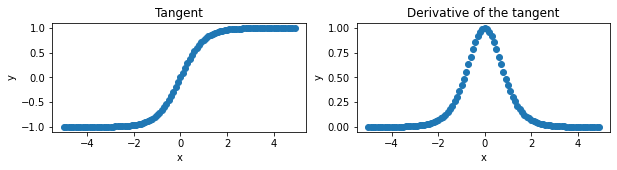

In [5]:
# Generator
tanh_gen = lambda x: (np.exp(x) - np.exp(-x)) / (np.exp(x) + np.exp(-x))

# Function
def tanh(x, deriv = False):
    tanh = (np.exp(x) - np.exp(-x)) / (np.exp(x) + np.exp(-x))
    if deriv:
        tanh_deriv = 1 - tanh**2
        return tanh_deriv
    else:
        return tanh
    
# Generate data points
x = np.arange(-5,5,0.1)
y = tanh(x)
y_deriv = tanh(x, deriv = True)

# Plot the sigmoid
_, ax = plt.subplots(1, 2, figsize=(10, 2))
ax1 = ax[0]
ax1.scatter(x, y)
ax1.set_title('Tangent')
ax1.set_xlabel('x')
ax1.set_ylabel('y')

# Plot the derivative of the sigmoid
ax2 = ax[1]
ax2.scatter(x, y_deriv)
ax2.set_title('Derivative of the tangent')
ax2.set_xlabel('x')
ax2.set_ylabel('y')

**Trivials**: As you can see, derivative of tangent is as much as 1, thus alleviate the vanishing gradient problem of sigmoid.  However, the gradient still quickly diminishes after $x$ is around -2 or 2

Let's try to use this

In [6]:
X = np.array([3, 4])
w = np.array([1, 2])
print("theta^Tx:", X @ w)
print("tangent of theta^Tx: ", tanh(X @ w))

theta^Tx: 11
tangent of theta^Tx:  0.9999999994421065


#### ReLU function

The ReLU is the most used activation function in the world right now.  It is used in almost all the convolutional neural networks or deep learning.  The formula is super simple as follows:

$$ g(x) = max(0, x) $$

The derivative is simply if $x$ is nonzero, then the derivative is 1. Otherwise, the derivative is 0.  This can be expressed as:

$$
\frac{dg}{dx} =
\begin{cases} 
0 & \text{if  }  x < 0 \\
1 & \text{if  }  x > 0 \\
\end{cases}
$$

Text(0, 0.5, 'y')

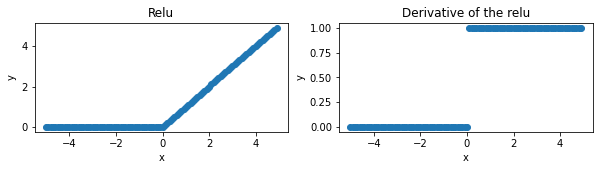

In [7]:
# Generator 
relu_gen = lambda x: x if x > 0 else 0

# Function
def relu(x, deriv = False):
    if deriv == True:
        x_relu = []
        for each in x:
            if each <= 0:
                x_relu.append(0)
            else:
                x_relu.append(1)  #derivative of x is 1
        return x_relu #np.ones_like(x)
    else:            
        return np.maximum(0, x) 
    
# Generate data points
x = np.arange(-5,5,0.1)
y = relu(x)
y_deriv = relu(x, deriv = True)

# Plot the sigmoid
_, ax = plt.subplots(1, 2, figsize=(10, 2))
ax1 = ax[0]
ax1.scatter(x, y)
ax1.set_title('Relu')
ax1.set_xlabel('x')
ax1.set_ylabel('y')

# Plot the derivative of the sigmoid
ax2 = ax[1]
ax2.scatter(x, y_deriv)
ax2.set_title('Derivative of the relu')
ax2.set_xlabel('x')
ax2.set_ylabel('y')

**Trivials**: As you can see, derivative of relu is also as much as 1.  In addition, the gradient remains 1 if $x$ is more than 0.  However, ReLu gradients can be fragile during training and can die. It can cause a weight update which will makes it never activate on any data point again. Simply saying, ReLu could result in dead neurons

Let's try to use this

In [8]:
X = np.array([3, 4])
w = np.array([1, 2])
print("theta^Tx:", X @ w)
print("relu of theta^Tx: ", relu(X @ w))

theta^Tx: 11
relu of theta^Tx:  11


#### Leaky Relu
As you can guess, to solve the possible dead neurons, we can implement a simple scalar to replace 0, so the negative values remain there.  The function is simple as follows:

$$
g(x) =
\begin{cases} 
\alpha * x & \text{if  }  x \leq 0 \\
x & \text{if  }  x > 0 \\
\end{cases}
$$

where the derivatives are

$$
\frac{dg}{dx} =
\begin{cases} 
\alpha & \text{if  }  x < 0 \\
1 & \text{if  }  x > 0 \\
\end{cases}
$$

Text(0, 0.5, 'y')

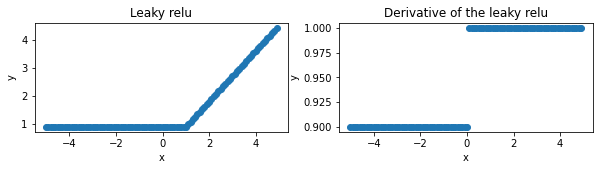

In [9]:
# Function
def lrelu(x, alpha = 0.9, deriv = False):
    if deriv == True:
        x_relu = []
        for each in x:
            if each <= 0:
                x_relu.append(alpha)
            else:
                x_relu.append(1)
        return x_relu #np.ones_like(x)
    else:            
        return np.maximum(alpha, alpha*x) 
    
# Generate data points
x = np.arange(-5,5,0.1)
y = lrelu(x)
y_deriv = lrelu(x, deriv = True)

# Plot the sigmoid
_, ax = plt.subplots(1, 2, figsize=(10, 2))
ax1 = ax[0]
ax1.scatter(x, y)
ax1.set_title('Leaky relu')
ax1.set_xlabel('x')
ax1.set_ylabel('y')

# Plot the derivative of the sigmoid
ax2 = ax[1]
ax2.scatter(x, y_deriv)
ax2.set_title('Derivative of the leaky relu')
ax2.set_xlabel('x')
ax2.set_ylabel('y')

**Trivials**: As you can see, derivative of leaky relu is now NOT 0 for negative x.  This will make sure it will not lead to dead neurons 

Let's try to use this

In [10]:
X = np.array([-3, -4])  #<---put negative for demonstration
w = np.array([1, 2])
print("theta^Tx:", X @ w)
print("relu of theta^Tx: ", lrelu(X @ w))

theta^Tx: -11
relu of theta^Tx:  0.9


### Where are we so far?

Well, we have so far motivated the followings:

1. We need a squashing function $g$ to use in classification problem
2. We also go through together different possible squashing function including sigmoid, tanh, relu, and leaky relu

For now, we shall use only sigmoid function, since we will be talking mainly about logistic regression.  But we shall go back to these other activation functions later on in the course.

Here, we shall explore three different variants of logistic regression:
1. Binary Logistic Regression
2. Multinomial (multiclass) Logistic Regression
3. Logistic Regression with Newton-Raphson method

Last, we shall explore the sklearn way.

**Be warned**: There will be a lot of equations but they are necessary to understand in order to do the implementation.  For some obvious derivations, I will leave them as your exercise, but if you feel inimidated, ask me in class or come to my office.

### Algorithm 1: Logistic Regression

Logistic regression is a binary classification algorithm by simply finding a best fitted line that separates two dataset.  In order to squash the output to a value between 0 and 1, logistic regression used a function called logit function (or sigmoid function)

**Implementation steps:**
    
1. Prepare your data
    - add intercept
    - $X$ and $y$ and $w$ in the right shape
        - $X$ -> $(m, n)$
        - $y$ -> $(m, )$
        - $w$ -> $(n, )$
        - where $m$ is number of samples
        - where $n$ is number of features
    - train-test split
    - feature scale
    - clean out any missing data
    - (optional) feature engineering
2. Predict and calculate the loss
    - The loss function is the *cross entropy* defined as
    $$J = - \Sigma_{i=1}^m y^{(i)}log(h) + (1-y^{(i)})log(1-h)$$
    where h is defined as the sigmoid function as
    $$h = \frac{1}{1+e^{-\theta^Tx}}$$
3. Calculate the gradient based on the loss
    - The gradient of $\theta_j$ is defined as
        $$\frac{\partial J}{\partial \theta_j} = \Sigma_{i=1}^{m}(h^{(i)}-y^{(i)})x_j$$
    - This can be derived by knowing that 
        $$J= y_1 log h + (1 - y_1) lg (1-h)$$
        $$h = \frac{1}{1+e^{-g}}$$
        $$g = \theta^Tx$$
    - Thus, gradient of $J$ in respect to some $\theta_j$ is
        $$\frac{\partial J}{\partial \theta_j} = \frac{\partial J}{\partial h} \frac{\partial h}{\partial g} \frac{\partial g}{\partial \theta_j}$$
      where
        $$\frac{\partial J}{\partial h} = \frac{y_1 - h}{h(1-h)}$$
        $$\frac{\partial h}{\partial g} = h(1-h)$$
        $$\frac{\partial g}{\partial \theta_j} = x_j$$
    - Thus, 
    $$
    \begin{align}
    \frac{\partial J}{\partial \theta_j} &= \frac{\partial J}{\partial h} \frac{\partial h}{\partial g} \frac{\partial g}{\partial \theta_j}\\
   &= \frac{y_1 - h}{h(1-h)} * h(1-h) * x_j\\
   &= (y_1 - h)x_j\\
   \end{align}
   $$
    - We can then put negative sign in front to make it negative loglikelihood, thus
       $$(h - y_i)x_j$$
4. Update the theta with this update rule
    $$\theta_j := \theta_j - \alpha * \frac{\partial J}{\partial \theta_j}$$
    where $\alpha$ is a typical learning rate range between 0 and 1
5. Loop 2-4 until max_iter is reached, or the difference between old loss and new loss are smaller than some predefined threshold tol

### Step 1: Prepare your data

#### 1.1 Get your X and y in the right shape

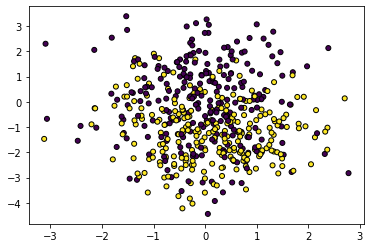

In [11]:
from sklearn import linear_model
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

#generate quite a lot of noise
#with only 4 informative features out of 10
#with 2 redundant features, overlapping with that 4 informative features
#and 4 noisy features
#Also, make std wider using n_clusters=2
X, y = make_classification(n_samples=500, n_features=10, n_redundant=2, n_informative=4,
                             n_clusters_per_class=2, random_state=14)
plt.scatter(X[:, 0], X[:, 1], marker='o', c=y,
            s=25, edgecolor='k')

#### 1.2 Feature scale your data to reach faster convergence

In [12]:
#feature scaling helps improve reach convergence faster
scaler = StandardScaler()
X = scaler.fit_transform(X)

#### 1.3 Train test split your data

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

#### 1.4 Add intercepts

In [14]:
intercept = np.ones((X_train.shape[0], 1))
X_train = np.concatenate((intercept, X_train), axis=1)  #add intercept
intercept = np.ones((X_test.shape[0], 1))
X_test = np.concatenate((intercept, X_test), axis=1)  #add intercept

### Step 2: Fit your algorithm 

#### 1. Define your algorithm

In [15]:
#here I use mini-batch as a demonstration
#you are free to use any variants of gradient descent
def mini_batch_GD(X, y, max_iter=1000):
    w = np.zeros(X.shape[1])
    l_rate = 0.01
    #10% of data
    batch_size = int(0.1 * X.shape[0])
    for i in range(max_iter):
        ix = np.random.randint(0, X.shape[0]) #<----with replacement
        batch_X = X[ix:ix+batch_size]
        batch_y = y[ix:ix+batch_size]
        cost, grad = gradient(batch_X, batch_y, w)
        if i % 500 == 0:
            print(f"Cost at iteration {i}", cost)
        w = w - l_rate * grad
    return w, i

def gradient(X, y, w):
    m = X.shape[0]
    h = h_theta(X, w)
    error = h - y
    #putting negative sign for negative log likelihood
    cost = -(np.sum(y * np.log(h) + (1 - y) * np.log(1 - h))) / m
    grad = (1/m) * np.dot(X.T, error)
    return cost, grad

def sigmoid(x):
    return 1 / (1 + np.exp(-x))
        
def h_theta(X, w):
    return sigmoid(X @ w)

def output(pred):
    return np.round(pred)

w, i = mini_batch_GD(X_train, y_train, max_iter=5000)

Cost at iteration 0 0.6931471805599452
Cost at iteration 500 0.406262629394194
Cost at iteration 1000 0.31874592218661235
Cost at iteration 1500 0.3794352065611485
Cost at iteration 2000 0.43837572021867083
Cost at iteration 2500 0.3706183517034917
Cost at iteration 3000 0.36166353737032897
Cost at iteration 3500 0.32716108938472965
Cost at iteration 4000 0.40082561986119947
Cost at iteration 4500 0.3664405873446444


#### 2. Compute accuracy

In [16]:
yhat = output(h_theta(X_test, w))

### Classification metrics

Let us study some classification metrics that are quite different from the $r^2$ or $mse$ that we see from the regression.  Let me define a confusion matrix that looks like this:

<code>
		 	    Actual
			    +	   -
Predicted +     TP     FP
          -     FN     TN
</code>

TP is defined as true positives, FP as false positives, FN as false negatives, and TN as true negatives.

#### Accuracy, Recall, Precision, F1

Accuracy is straightforward

$$ Accuracy = \frac{TP + TN}{TP + TN + FP + FN} $$

Accuracy is mostly avoided, unless your model is really balanced of both positives and negatives.  Instead, more useful classification metrics would be precision, recall, and f1-score

$$ Precision = TP / (TP + FP) $$

Precision is useful as metric when you want to prioritize removing false positive.  Example is search engine in which you do not want to return any search results that are "false positive"

$$ Recall = TP / (TP + FN) $$

Recall is useful as metric when you want to prioritize removing false negative.  Example is cancer detection in which you do not want to miss detecting any real positive (i.e., false negative).

$$ F1 = 2 x \frac{Precision * Recall}{Precision+Recall} $$

F1 is simply seeking a balance between Precision and Recall.  Also F1 is good metric when there is an uneven class distribution (large number of actual negatives)

To get accuracy, recall, precision and f1 score, we can use **sklearn.metrics.classification_report**.

In [17]:
from sklearn.metrics import classification_report
print("=========Classification report=======")
print(classification_report(y_test, yhat))

=========Classification report=======
              precision    recall  f1-score   support

           0       0.81      0.83      0.82        76
           1       0.82      0.80      0.81        74

    accuracy                           0.81       150
   macro avg       0.81      0.81      0.81       150
weighted avg       0.81      0.81      0.81       150



#### ROC

An ROC curve shows the performance of one classification model at **all classification thresholds**. For example, if we set threshold to 0.4, then anything less than 0.4 will be negative class, and otherwise positive class.  To build the ROC curve, you iterate all possible threshold, and collect the TP, FP, TN, TP of all possible threshold.

ROC curves typically feature true positive rate on the Y axis, and false positive rate on the X axis, where

$$ TPR = TP / (TP + FN) $$

$$ FPR = FP / (FP + TN) $$

This means that the top left corner of the plot is the “ideal” point - a false positive rate of zero, and a true positive rate of one. This is not very realistic, but it does mean that a larger area under the curve (AUC) is usually better.

To get area score under the curve, we can use **sklearn.metrics.roc_auc_score**

In [18]:
from sklearn.metrics import roc_auc_score
print("=========ROC AUC score=======")
print(roc_auc_score(y_test, yhat))

=========ROC AUC score=======
0.813122332859175


#### Precision-Recall

Davis and Goadrich in this paper (https://ftp.cs.wisc.edu/machine-learning/shavlik-group/davis.icml06.pdf) propose that Precision-Recall (PR) metric will be more informative than ROC when dealing with highly skewed datasets. Because Precision is directly influenced by class imbalance so the Precision-recall are better to highlight differences between models for highly imbalanced data sets. When you compare different models with imbalanced settings, the area under the Precision-Recall curve will be more sensitive than the area under the ROC curve.

Example of drawback of ROC curve

- $TPR = TP / (TP + FN) $
- $FPR = FP / (FP + TN) $

======balanced data=====
- n_sample = 500
- pos = 250
- neg = 250
- Given the following confusion matrix

<code>
			Actual
			  +	     -
Predict.+     125     125
        -     0       250
</code>

- $TPR = 125 / (125 + 0) = 1$
- $FPR = 125 / 125 + 250 = 0.3$

Looks ok!

=====imbalanced data=======
- n_sample = 500
- pos = 30
- neg = 470
- Given the following confusion matrix

<code>
			Actual
			  +	     -
Predict.+     15     15
        -     0      470
</code>

- $TPR = 15 / (15 + 0)$ = 1
- $FPR = 15/ (15 + 470) {\approx} 0$

Perfect model??  How?  Because the amount of wrong positives is undermined by the great amount of negatives

====Precision-Recall curve works much better for imbalanced=====

- Precision =  TP / (TP + FP)
- Recall = TP / (TP + FN)

- Precision = 15 / (15 + 15) = 0.5. #minimize false positive
- Recall = 15 / (15 + 0) = 1.   #minimize false negative

Reflect much better!

For precision-recall metric, we can use **sklearn.metrics.average_precision_score** which compute the ratio between recall and precision (read more here -->https://scikit-learn.org/stable/auto_examples/model_selection/plot_precision_recall.html#sphx-glr-auto-examples-model-selection-plot-precision-recall-py). 

**Note**: sklearn version of average_precision_score are typically used in binary classification to study the output of a classifier. In order to extend the precision-recall curve and average precision to multi-class or multi-label classification, it is necessary to **binarize** the output. I have demonstrated this at the multinomial logistic regression part

In [19]:
from sklearn.metrics import average_precision_score
print("=========Average precision score=======")
print(average_precision_score(y_test, yhat))

=========Average precision score=======
0.7533408408408407


### Algorithm 2: Multinomial Logistic Regression

This is logistic regression when number of classes are more than 2.

**Implementation steps:**
    
The gradient descent has the following steps:

1. Prepare your data
    - add intercept
    - $X$ and $y$ and $w$ in the right shape
        - $X$ -> $(m, n)$
        - $y$ -> $(m, k)$
        - $w$ -> $(n, k)$
        - where $k$ is number of classes
    - train-test split
    - feature scale
    - clean out any missing data
    - (optional) feature engineering
2. Predict and calculate the loss
    - The loss function $J$ is the cross entropy defined as
    $$J = -\Sigma_{i=1}^m y^{(i)}log(h)$$
    where $h$ is defined as the softmax function as
    $$ p(y = a \mid \theta) = \frac{e^{\theta^{T}_ax}}{\Sigma_{i=1}^{k} e^{\theta_k^{T}x}}$$
3. Calculate the gradient of theta of feature $j$ based on the loss function $J$
    - The gradient is defined as
       $$\frac{\partial J}{\partial \theta_j} = \Sigma_{i=1}^{m}(h^{(i)}-y^{(i)})x_j$$
    - This gradient can be derived from the following simple example:
        - Suppose given 2 classes (k = 2) and 3 features (n = 3), we have the loss function as
       $$ J = -y_1 log h_1 - y_2 log h_2 $$
       where $h_1$ and $h_2$ are
       $$ h_1 = \frac{\exp(g_1)}{\exp(g_1)+\exp(g_2)} $$
       $$ h_2 = \frac{\exp(g_2)}{\exp(g_1)+\exp(g_2)} $$
       where $g_1$ and $g_2$ are
       $$ g_1 = w_{11}x_1 + w_{21}x_2 + w_{31}x_3 $$
       $$ g_2 = w_{12}x_1 + w_{22}x_2 + w_{32}x_3  $$
       where in $w_{ij}$, $i$ stands for feature and $j$ stands for class 
    - For example, to find the gradient of $J$ in respect to $w_{21}$, we simply can use the chain rule (or backpropagation) to calculate like this:
       $$ \frac{\partial J}{\partial w_{21}} = \frac{\partial J}{\partial h_{1}}\frac{\partial h_{1}}{\partial g_{1}}\frac{\partial g_{1}}{\partial w_{21}} + \frac{\partial J}{\partial h_{2}}\frac{\partial h_{2}}{\partial g_{1}}\frac{\partial g_{1}}{\partial w_{21}}$$
   - If we know each of them, it is easy, where
       $$\frac{\partial J}{\partial h_{1}} = -\frac{y_1}{h_1}$$
       $$\frac{\partial J}{\partial h_{2}} = -\frac{y_2}{h_2}$$
       $$\frac{\partial h_{1}}{\partial g_{1}} = \frac{\exp(g_{1})}{\exp(g_{1}) + \exp(g_{2})} - (\frac{\exp(g_1)}{\exp(g_1)+\exp(g_2)})^2 = h_1 (1 - h_1)$$
       $$\frac{\partial h_{2}}{\partial g_{1}} = \frac{-exp(g_2)exp(g_1)}{(\exp(g_1) + \exp(g_2)^2} = -h_2h_1$$
       $$\frac{\partial g_1}{\partial w_{21}} = x_2$$
    - For those who forgets how to do third and fourth, recall that the quotient rule
        $$ (\frac{f}{g})' = \frac{f'g - fg'}{g^2}$$
    - Putting everything together, we got
    $$
    \begin{align}
    \frac{\partial J}{\partial w_{21}} & = \frac{\partial J}{\partial h_{1}}\frac{\partial h_{1}}{\partial g_{1}}\frac{\partial g_{1}}{\partial w_{21}} + \frac{\partial J}{\partial h_{2}}\frac{\partial h_{2}}{\partial g_{1}}\frac{\partial g_{1}}{\partial w_{21}}\\
   &= -\frac{y_1}{h_1} * h_1 (1 - h_1) * x_2 + -\frac{y_2}{h_2} * -h_2h_1 * x_2 \\
   &= x_2 (-y_1 + y_1h_1 + y_2h_1)\\
   &= x_2 (-y_1 + h_1(y_1 + y_2))\\
   &= x_2 (h_1 - y_1)\\
   \end{align}
   $$
4. Update the theta with this update rule
    $$\theta_j := \theta_j - \alpha * \frac{\partial J}{\partial \theta_j}$$
    where $\alpha$ is a typical learning rate range between 0 and 1
5. Loop 2-4 until max_iter is reached, or the difference between old loss and new loss are smaller than some predefined threshold tol

### Step 2: Fit your algorithm 

#### 1. Define your algorithm

In [20]:
from sklearn import datasets

#Step 1: Prepare data

# import some data to play with
iris = datasets.load_iris()
X = iris.data[:, 2:]  # we only take the first two features.
y = iris.target  #now our y is three classes thus require multinomial

#feature scaling helps improve reach convergence faster
scaler = StandardScaler()
X = scaler.fit_transform(X)

#data split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

#add intercept to our X
intercept = np.ones((X_train.shape[0], 1))
X_train = np.concatenate((intercept, X_train), axis=1)  #add intercept
intercept = np.ones((X_test.shape[0], 1))
X_test = np.concatenate((intercept, X_test), axis=1)  #add intercept

#make sure our y is in the shape of (n, k)
#we will convert our output vector in 
#matrix where no of columns is equal to the no of classes. 
#The values in the matrix will be 0 or 1. For instance the rows 
#where we have output 2 the column 2 will contain 1 and rest all 0.
#in simple words, y will be of shape (m, k)
k = len(set(y))  #no. of class  (can also use np.unique)
m = X_train.shape[0]  #no.of samples
n = X_train.shape[1]  #no. of features
y_train_encoded = np.zeros((m, k))
for each_class in range(k):
    cond = y_train==each_class
    y_train_encoded[np.where(cond), each_class] = 1

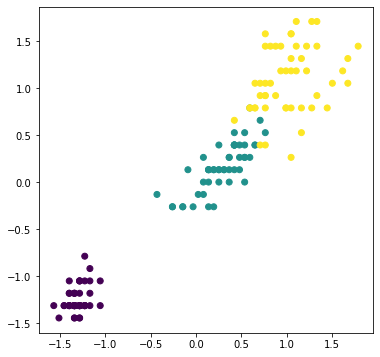

In [21]:
#Step 1.1 (optional): Visualize our data

#your code here
plt.figure(figsize=(6,6))
plt.scatter(X[:, 0], X[:, 1], label='class 0', c=y)
plt.show()

In [22]:
#Step 2: Fit your data

def logistic_regression_GD(X, y, k, n, max_iter=1000):
    '''
    Inputs: 
        X shape: (m, n)
        w shape: (n, k)
    '''
    w = np.random.rand(n, k)
    l_rate = 0.01
    for i in range(max_iter):
        cost, grad =  gradient(X, y, w)
        if i % 500 == 0:
            print(f"Cost at iteration {i}", cost)
        w = w - l_rate * grad
    return w, i

#for those who tend to feel overwhelmed with lots of code
#I recommend you to write each part of the code separately as function
#it helps!
def gradient(X, y, w):
    m = X.shape[0]
    h = h_theta(X, w)
    cost = -np.sum(y*np.log(h))/m
    error = h - y
    grad = softmax_grad(X, error)
    return cost, grad

def softmax(x):
    return np.exp(x) / np.sum(np.exp(x), axis=1, keepdims=True)

def softmax_grad(X, error):
    return  X.T @ error
        
def h_theta(X, w):
    '''
    Input:
        X shape: (m, n)
        w shape: (n, k)
    Returns:
        yhat shape: (m, k)
    '''
    return softmax(X @ w)

w, i = logistic_regression_GD(X_train, y_train_encoded, k, X_train.shape[1], max_iter=5000)

Cost at iteration 0 1.4069751485177675
Cost at iteration 500 0.08178008797108156
Cost at iteration 1000 0.07443161623160394
Cost at iteration 1500 0.07211799723212245
Cost at iteration 2000 0.0710975396795072
Cost at iteration 2500 0.07056529336010732
Cost at iteration 3000 0.07025507765077839
Cost at iteration 3500 0.07005837011572033
Cost at iteration 4000 0.06992482143519228
Cost at iteration 4500 0.06982886741378148


#### 2. Compute accuracy

In [23]:
yhat = np.argmax(h_theta(X_test, w), axis=1)
print("=========Classification report=======")
print("Report: ", classification_report(y_test, yhat))

=========Classification report=======
Report:                precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       1.00      0.95      0.97        20
           2       0.89      1.00      0.94         8

    accuracy                           0.98        45
   macro avg       0.96      0.98      0.97        45
weighted avg       0.98      0.98      0.98        45



Average precision score.  Recall that in a multiclass format, we have to calculate for each class, and then take the average.  And before we do that, we need to binarize our y.

In [24]:
from sklearn.preprocessing import label_binarize
print("=========Average precision score=======")
y_test_binarized = label_binarize(y_test, classes=[0, 1, 2])
yhat_binarized = label_binarize(yhat, classes=[0, 1, 2])

n_classes = len(np.unique(y_test))

for i in range(n_classes):
    class_score = average_precision_score(y_test_binarized[:, i], yhat_binarized[:, i])
    print(f"Class {i} score: ", class_score)

=========Average precision score=======
Class 0 score:  1.0
Class 1 score:  0.9722222222222222
Class 2 score:  0.8888888888888888


### Sklearn way

In [25]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(multi_class="ovr")  #set this to multiclass="ovr" to perform multinomial logistic

model.fit(X_train, y_train)
yhat = model.predict(X_test)

print("=========Average precision score=======")
y_test_binarized = label_binarize(y_test, classes=[0, 1, 2])
yhat_binarized = label_binarize(yhat, classes=[0, 1, 2])

n_classes = len(np.unique(y_test))

for i in range(n_classes):
    class_score = average_precision_score(y_test_binarized[:, i], yhat_binarized[:, i])
    print(f"Class {i} score: ", class_score)

print("=========Classification report=======")
print("Report: ", classification_report(y_test, yhat))

=========Average precision score=======
Class 0 score:  1.0
Class 1 score:  0.7777777777777778
Class 2 score:  0.5
=========Classification report=======
Report:                precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       1.00      0.60      0.75        20
           2       0.50      1.00      0.67         8

    accuracy                           0.82        45
   macro avg       0.83      0.87      0.81        45
weighted avg       0.91      0.82      0.83        45



### Algorithm 3: Logistic Regression with Newton Raphson method

Newton Raphson method is an alternative way to gradient descent in Logistic Regression.  Instead of simply looking at each step on the slope, we take a second derivative to find the curvature towards the derivatives = 0.  It is typically faster than normal gradient descent, but as the number of features grow, its performance can hurt due to matrix inverse and finding second derivatives.

**Implementation steps:**
    
1. Prepare your data
    - add intercept
    - $X$ and $y$ and $w$ in the right shape
        - $X$ -> $(m, n)$
        - $y$ -> $(m,  )$
        - $w$ -> $(n,  )$
    - train-test split
    - feature scale
    - clean out any missing data
    - (optional) feature engineering
2. Predict and calculate the loss
    - The loss function is the cross entropy defined as
    $$J = - \Sigma_{i=1}^m y^{(i)}log(h) + (1-y^{(i)})log(1-h)$$
    where h is defined as the sigmoid function as
    $$h = \frac{1}{1+e^{-\theta^Tx}}$$
3. Calculate the direction based on the curvature of $\theta_j$ defined as
    $$curv(\theta_j) = H^{-1}(\theta_j) \nabla f(\theta_j) $$
    where $H^{-1}(\theta_j)$ of $f$ is a matrix of size (n, n) of second derivatives in which $H_{ij} = \frac{\partial^2f}{\partial w_i \partial w_j}$  and $\nabla f$ is the gradient of f, its vector of size (n, ) of partial derivatives $[\frac{\partial f}{\partial w_1}, \frac{\partial f}{\partial w_2},.... \frac{\partial f}{\partial w_p}]$
    - To make our program easy to implement, we can derive that 
        $$H = X^TSX$$
      where $S$ is a diagonal matrix of the first derivative, i.e., $h(1-h)$
4. Update the theta with this update rule
    $$\theta_j := \theta_j - curv$$
5. Loop 2-4 until max_iter is reached, or the difference between old loss and new loss are smaller than some predefined threshold tol

### Step 1: Prepare your data

#### 1.1 Get your X and y in the right shape

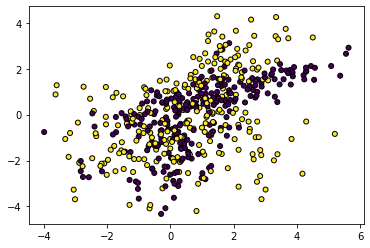

In [26]:
#generate quite a lot of noise
#with only 4 informative features out of 10
#with 2 redundant features, overlapping with that 4 informative features
#and 4 noisy features
#Also, make std wider using n_clusters=2
X, y = make_classification(n_samples=500, n_features=5, n_redundant=1, n_informative=4,
                             n_clusters_per_class=2, random_state=14)
plt.scatter(X[:, 0], X[:, 1], marker='o', c=y,
            s=25, edgecolor='k')

#### 1.2 Feature scale your data to reach faster convergence

In [27]:
#feature scaling helps improve reach convergence faster
scaler = StandardScaler()
X = scaler.fit_transform(X)

#### 1.3 Train test split your data

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

#### 1.4 Add intercepts

In [29]:
intercept = np.ones((X_train.shape[0], 1))
X_train = np.concatenate((intercept, X_train), axis=1)  #add intercept
intercept = np.ones((X_test.shape[0], 1))
X_test = np.concatenate((intercept, X_test), axis=1)  #add intercept

### Step 2: Fit your algorithm 

#### 1. Define your algorithm

In [30]:
#here I use mini-batch as a demonstration
#you are free to use any variants of gradient descent
def newton(X, y, max_iter=1000):
    w = np.zeros(X.shape[1])
    l_rate = 0.01
    #10% of data
    batch_size = int(0.1 * X.shape[0])
    for i in range(max_iter):
        ix = np.random.randint(0, X.shape[0])
        batch_X = X[ix:ix+batch_size]
        batch_y = y[ix:ix+batch_size]
        cost, second, first = newton_curve(batch_X, batch_y, w)
        if i % 500 == 0:
            print(f"Cost at iteration {i}", cost)
        H_inverse = np.linalg.pinv(second)
        w = w - l_rate * H_inverse @ first
    return w, i

def newton_curve(X, y, w):
    m = X.shape[0]
    h = h_theta(X, w)
    error = h - y
    cost = -(np.sum(-y * np.log(h) - (1 - y) * np.log(1 - h))) / m
    first = (1/m) * np.dot(X.T, error)
    second = X.T @ np.diag((h) * (1-h)) @ X
    return cost, second, first

def sigmoid(x):
    return 1 / (1 + np.exp(-x))
        
def h_theta(X, w):
    return sigmoid(X @ w)

def output(pred):
    return np.round(pred)

w, i = newton(X_train, y_train, max_iter=5000)

Cost at iteration 0 -0.6931471805599452
Cost at iteration 500 -0.6275739710325615
Cost at iteration 1000 -0.568398825759294
Cost at iteration 1500 -0.5812778197752982
Cost at iteration 2000 -0.5432930508032909
Cost at iteration 2500 -0.4658626806249445
Cost at iteration 3000 -0.4469244583557673
Cost at iteration 3500 -0.4033237964010844
Cost at iteration 4000 -0.3768456762884273
Cost at iteration 4500 -0.5066246665260992


#### 2. Compute accuracy

In [31]:
yhat = output(h_theta(X_test, w))
print("=========Average precision score=======")
print(average_precision_score(y_test, yhat))
print("=========Classification report=======")
print("Report: ", classification_report(y_test, yhat))

=========Average precision score=======
0.8267202141900937
=========Classification report=======
Report:                precision    recall  f1-score   support

           0       0.75      0.83      0.79        60
           1       0.88      0.81      0.84        90

    accuracy                           0.82       150
   macro avg       0.81      0.82      0.82       150
weighted avg       0.83      0.82      0.82       150



### Sklearn way

In [32]:
model = LogisticRegression()  #set this to multiclass="ovr" to perform multinomial logistic

model.fit(X_train, y_train)
yhat = model.predict(X_test)

print("=========Average precision score=======")
print(average_precision_score(y_test, yhat))
print("=========Classification report=======")
print("Report: ", classification_report(y_test, yhat))

=========Average precision score=======
0.8404040404040404
=========Classification report=======
Report:                precision    recall  f1-score   support

           0       0.73      0.88      0.80        60
           1       0.91      0.78      0.84        90

    accuracy                           0.82       150
   macro avg       0.82      0.83      0.82       150
weighted avg       0.84      0.82      0.82       150



### When to Use Logistic Regression

Almost always, as a baseline though!  Logistic Regression make an assumption based on linearity and as long as your data is approximately linear, Logistic Regression work fantastic.  There are also some clear advantages:
- They are quite fast for both training and prediction
- They have very few (if any) tunable parameters
- Descent algorithms works well with Logistic Regression

The only problem of Logistic Regression lies on its limitation of linearity.  I would usually try Naive Bayesian, followed by Logistic Regression as baseline.  And if the accuracy is quite low, I would try other non-linear classification models such as SVM or KNN or Decision Tree.